In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
%run train --sz=256 --nt=5 --bs=7 --num_gpus=2 --gpu_start=2 --mt-idx=4\
    --pred-mode=skip --data-idx=1,2,3,4,5 --epochs=2 --max_lr=1e-3 --notrain

ValueError: The RNN cell should have an attribute `state_size` (tuple of integers, one integer per RNN state).

In [2]:
from predrain import *
sz = 256
nt = 10
bs = 2 # calculate this
num_gpus = 1
gpu_start = 0
pred_mode = 'skip'

In [3]:
mt = ModelType.PredNetLeakyRelu

In [4]:
P = Predrain()
P.set_config(sz, nt, bs, mt, num_gpus, gpu_start, pred_mode=pred_mode, allow_growth=False)

In [5]:
P.get_data(pred_mode=pred_mode, idx=range(1, 1 + 2))

((<tf.Tensor 'IteratorGetNext:0' shape=(?, 10, 256, 256, 1) dtype=float32>,
  <tf.Tensor 'zeros:0' shape=(2, 1) dtype=float32>),
 (<tf.Tensor 'IteratorGetNext_1:0' shape=(?, 10, 256, 256, 1) dtype=float32>,
  <tf.Tensor 'zeros_1:0' shape=(2, 1) dtype=float32>),
 45000,
 5000)

In [6]:
P.get_model(mt)

In [12]:
# P.load(ModelType.PredNetOriginal, 128, 1)
P.model.load_weights('../data/models/checkpoints/weights.PredNetOriginal_128.01.h5')

sz=256 transfered from sz=128

In [ ]:
P.train(2, 1e-2)

Epoch 1/2
21767/45000 [=============>................] - ETA: 3:24:36 - loss: 0.0308

In [7]:
lrfinder = P.lr_find()

Epoch 1/1
 - LRFinder: lr = 0.00001012 
1124/1125 [============================>.] - ETA: 0s - loss: 0.1912 - LRFinder: Skipping iteration since loss is 4 times as large as best loss (0.0061)
	LR Finder : Saved the losses and learning rate values in path : {../data/models/lrs/PredNetLeakyRelu_256_skip}
1125/1125 [==============================] - 596s 529ms/step - loss: 0.1911


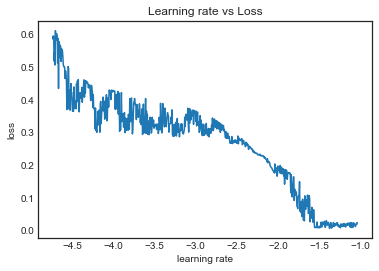

In [10]:
lrfinder.plot_schedule(50)

find lr on leaky prednet

In [36]:
mt = ModelType.PredNetLeakyRelu

In [37]:
P = Predrain()
P.set_config(sz, nt, bs, mt, num_gpus, gpu_start, allow_growth=False)

In [38]:
P.get_data(pred_mode='skip')

/usr/local/anaconda3/envs/pred-rain/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)


((<tf.Tensor 'IteratorGetNext_8:0' shape=(?, 10, 256, 256, 1) dtype=float32>,
  <tf.Tensor 'zeros_8:0' shape=(6, 1) dtype=float32>),
 (<tf.Tensor 'IteratorGetNext_9:0' shape=(?, 10, 256, 256, 1) dtype=float32>,
  <tf.Tensor 'zeros_9:0' shape=(6, 1) dtype=float32>),
 22500,
 2500)

In [39]:
P.get_model(mt)

In [40]:
P.load(ModelType.PredNetOriginal)

Epoch 1/1
 - LRFinder: lr = 0.00001077 
186/187 [============================>.] - ETA: 2s - loss: 0.2597 - LRFinder: lr = 9.99999579 
	LR Finder : Saved the losses and learning rate values in path : {../data/models/lrs/PredNetLeakyRelu_256}
187/187 [==============================] - 376s 2s/step - loss: 0.2589


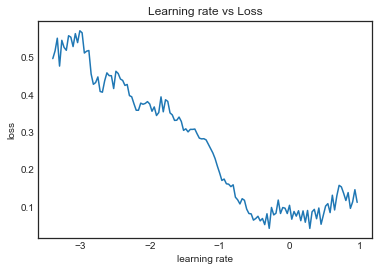

In [45]:
lrfinder.plot_schedule(50)

In [ ]:
P.load(ModelType.PredNetO)

upsample

In [55]:
sz = 256
bs = 6

In [60]:
P = Predrain()
P.set_config(sz, nt, bs, mt, num_gpus, gpu_start, allow_growth=False, comment='from_128')
P.get_data(pred_mode='skip')
P.get_model(mt)

/usr/local/anaconda3/envs/pred-rain/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)


In [61]:
P.load(ModelType.PredNetOriginal, 128, 1)

In [ ]:
P.train(4, 1e-1)

Epoch 1/4
 1210/15000 [=>............................] - ETA: 7:47:39 - loss: 0.0445

Fine tune sz256 to sz512

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from predrain import *
sz = 512
nt = 5
bs = 1 # calculate this
num_gpus = 1
gpu_start = 1
pred_mode = 'skip'

In [3]:
mt = ModelType.PredNetLeakyRelu

In [4]:
P = Predrain()
P.set_config(sz, nt, bs, mt, num_gpus, gpu_start, pred_mode=pred_mode, allow_growth=False)

In [5]:
P.get_data(pred_mode=pred_mode, idx=range(1, 1 + 5))

((<tf.Tensor 'IteratorGetNext:0' shape=(?, 5, 512, 512, 1) dtype=float32>,
  <tf.Tensor 'zeros:0' shape=(1, 1) dtype=float32>),
 (<tf.Tensor 'IteratorGetNext_1:0' shape=(?, 5, 512, 512, 1) dtype=float32>,
  <tf.Tensor 'zeros_1:0' shape=(1, 1) dtype=float32>),
 112500,
 12500)

In [30]:
P.get_model(mt, output_mode='error')

In [44]:
model_callbacks = [tf.keras.callbacks.TensorBoard(log_dir=str(P.path_logs), histogram_freq=1, batch_size=bs, write_images=True),
                   OneCycleLR(P.num_samples, 1, bs, 1e-3,
                    end_percentage=0.1, scale_percentage=None,
                    maximum_momentum=0.3, minimum_momentum=0.3, verbose=True)]

In [46]:
trn_steps, val_steps = [int(1 * o / bs) for o in (P.num_samples, P.val_num_samples)]
x, y = P.trn_tensors
P.model.fit(x, y, epochs=4, validation_data=P.val_tensors, callbacks=model_callbacks, 
                  steps_per_epoch=trn_steps, validation_steps=val_steps)

Epoch 1/4
   137/112500 [..............................] - ETA: 15:59:58 - loss: 0.0569

KeyboardInterrupt: 